<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Dirty Data](#dirty) <br>
[1.1. Data Loading](#load) <br>
[1.2. Data Exploration](#explore) <br>
[1.3. Column wise inspection](#inspect) <br>
$\;\;\;\;$[1.3.1. Date](#date) <br>
$\;\;\;\;$[1.3.2. Geographical Coordinates](#cood) <br>
$\;\;\;\;$[1.3.3. Warehouse Names](#warehouse) <br>
$\;\;\;\;$[1.3.4. Shopping Cart](#cart) <br>
$\;\;\;\;$[1.3.5. Order Price](#price) <br>
$\;\;\;\;$[1.3.6. is_expedited_delivery](#expedite) <br>
$\;\;\;\;$[1.3.7. Season](#expedite) <br>
$\;\;\;\;$[1.3.8. Order total](#total) <br>
[2. Corrections](#correction) <br>
[2.1. Date](#date2) <br>
[2.2. Coordinates](#cood2) <br>
[2.3. Season](#season2) <br>
[2.4. Warehouse Names](#name) <br>
[2.5. Warehouse Distance](#dist) <br>
[2.6. Expedite](#exp2) <br>
[2.7. Cutomer_happiness](#happy) <br>
[2.8. Shopping Cart](#cart2) <br>
[2.9. Order Price](#price2) <br>
[Order Total](#total2) <br>
[Outlier Data](#Outlier) <br>
[3.1. Data Loading and Cleaning](#Cleaning) <br>
[3.2 Delivery Charge](#Charge) <br>
$\;\;\;\;$[3.2.1 Inter Quartile Rangw](#Inter) <br>
$\;\;\;\;$[3.2.2 Linear Regression Model](#Model) <br>
[3.3 Converting it into CSV](#Converting) <br>
[4.0 Missing](#missing) <br>
[4.1. EDA](#eda2) <br>
[4.2. Missing Values](#miss) <br>
[4.2. Column Inspection](#col2) <br>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="alert alert-block alert-warning">

# 1.  Dirt Data.CSV<a class="anchor" name="#dirty"></a>
    
</div>

<div class="alert alert-block alert-warning">

# 1.1.  Data Loading  <a class="anchor" name="#load"></a>
    
</div>

In [ ]:
# Read first file
import pandas as pd

path_dirty ='/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group146/Group146_dirty_data.csv'

dirty = pd.read_csv(path_dirty)

<div class="alert alert-block alert-warning">

# 1.2.  Data Exploration  <a class="anchor" name="#explore"></a>
    
</div>

In [ ]:
dirty.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD057529,ID6167413275,2019-07-26,Nickolson,"[('iAssist Line', 2), ('iStream', 2)]",4750,76.46,-37.815375,144.959666,10,4351.46,Winter,False,0.9403,NaN,True
1,ORD182030,ID0767752593,2019-10-14,Nickolson,"[('Olivia x460', 2), ('iStream', 1), ('Thunder...",9230,83.35,-37.804926,144.969378,5,8851.85,Spring,False,0.7087,"phone fast and speedy. filled with features , ...",True
2,ORD386119,ID0164063139,2019-09-18,Thompson,"[('Toshika 750', 2), ('iStream', 2)]",8940,75.88,-37.814882,144.954931,5,8568.88,Spring,False,0.7338,pretty cool. i have only begun to figure out t...,True
3,ORD488733,ID0332544860,2019-08-14,Thompson,"[('Lucent 330S', 2), ('iStream', 2), ('Alcon 1...",25670,62.28,-37.811022,144.950512,0,25732.28,Winter,False,0.3542,working great! my mom still using working grea...,True
4,ORD131365,ID2317966813,2019-04-06,Nickolson,"[('Universe Note', 1), ('Olivia x460', 2)]",5900,79.65,-37.810645,144.975660,5,5684.65,summer,True,1.0353,olivia all the way best phone i ever had.,True


Above we get an idea of what the data looks like in the file.

In [ ]:
dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [ ]:
# Look for missing values
dirty.shape

(500, 16)

In [ ]:
dirty.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,13779.710000,75.50572,-27.942723,135.096626,10.820000,12261.879480,1.079324
std,7874.302677,13.90634,41.352821,41.352742,8.589246,7029.897922,0.514914
min,580.000000,45.20000,-37.829848,-37.824563,0.000000,625.950000,0.031900
25%,7487.500000,65.55500,-37.818829,144.948699,5.000000,6829.235000,0.703700
50%,12450.000000,74.96000,-37.812456,144.962853,10.000000,11066.385000,1.042400
75%,19280.000000,82.69500,-37.805289,144.981066,15.000000,17243.687500,1.436100
max,41340.000000,116.44000,145.013822,145.018659,25.000000,36422.390000,2.829200


In [ ]:
dirty.isna().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,0
shopping_cart,0
order_price,0
delivery_charges,0
customer_lat,0
customer_long,0
coupon_discount,0


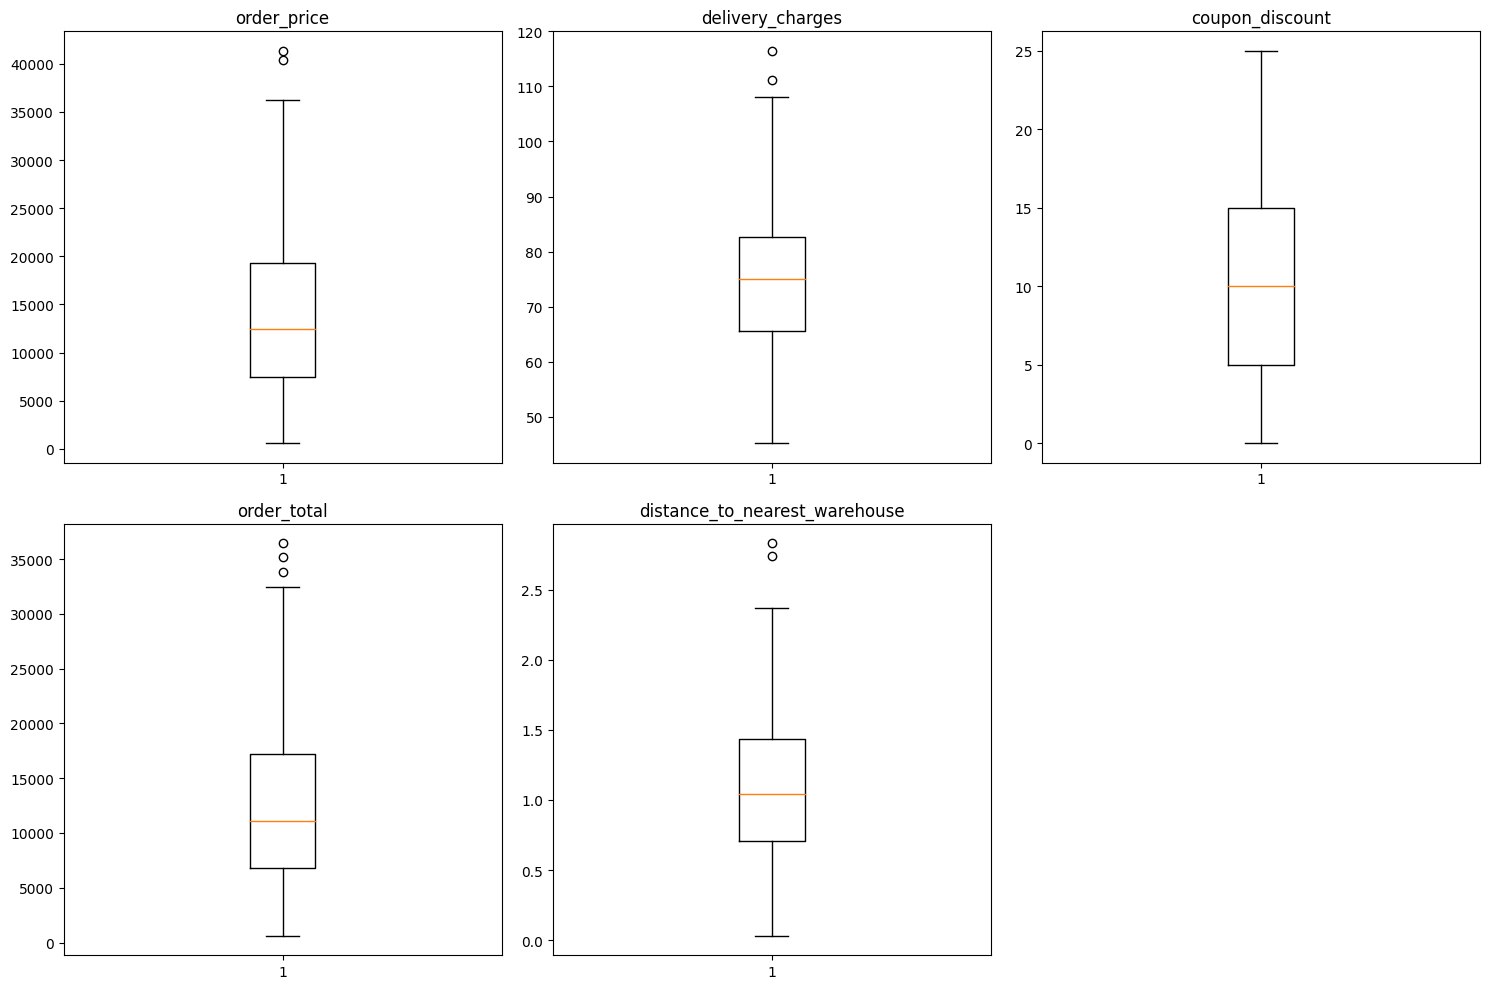

In [ ]:
import matplotlib.pyplot as plt

# Select numeric columns to check for outliers
numeric_columns = ['order_price', 'delivery_charges', 'coupon_discount', 'order_total', 'distance_to_nearest_warehouse']

# Plot boxplots to visualize outliers for each numeric column
plt.figure(figsize=(15, 10))  # Adjust figure size for better visibility
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(dirty[column])
    plt.title(column)

# Adjust layout for neatness
plt.tight_layout()
plt.show()

We have now looked at the basic structure of the data.

1. Order price:
The median The median order price, which is approximately 15,000, is shown by the orange line in the box. This means that 50% of orders have a price over this amount, and 50% have a price below it.
Range of Interquartiles (IQR): The range from the 25th percentile (Q1) to the 75th percentile (Q3) is displayed in the box. In terms of IQR, the middle 50% of the data falls between around 10,000 and 20,000.
Whiskers: Within 1.5 times the IQR, the whiskers extend from the box to the lowest and greatest values.
Outliers: Order_price values that are abnormally high (over 35,000) are represented by the dots above the whiskers. These anomalies may represent exceptional instances of high-value orders or possible mistakes.
2. Delivery fees:
Median: Half of the orders have delivery charges less 80, and the other half have delivery prices above 80. The median delivery charge is roughly 80.
IQR: The majority of purchases suffer charges in this range, as evidenced by the concentration of delivery fees between 70 and 90.
Outliers: A few orders have delivery costs that are abnormally high, which may necessitate more research. These orders are above the 110 mark.
3. coupon_discount: Median: The majority of orders receive a discount that is comparable to the median coupon discount, which is approximately 10.
IQR: The majority of coupon reductions range from five to fifteen.
No Outliers: This box plot displays no outliers, in contrast to the other variables, suggesting a more uniform distribution of coupon discounts throughout the dataset.
4. order_total: Median: The median order_total, which displays the average order price, is roughly 10,000.
IQR: The bulk of orders fall within this price range, as evidenced by the fact that most order totals fall between 5,000 and 20,000.
Outliers: A few outliers with total orders over 30,000 indicate abnormally high numbers. These could be important purchases or unique situations.
5. How far is the nearest warehouse?
Median: The median distance (perhaps measured in kilometers or another distance unit) to the closest warehouse is approximately 1.0.
IQR: The majority of clients are located quite close to the warehouse, as evidenced by the fact that most orders are placed within 0.5 and 1.5 miles from the closest warehouse.
Outliers: There are a few outliers above 2.0, suggesting that some orders originate from places further away from the closest warehouse.
Overall Findings:
Medians: The midway of the data distribution is represented by the orange lines in each plot, which indicate the central tendency (median) for each variable.
IQR: The boxes provide information about the typical dispersion of each variable by displaying the interquartile range, which is where the majority of the data is located.

Overall Findings:
Medians: The midway of the data distribution is represented by the orange lines in each plot, which indicate the central tendency (median) for each variable.
IQR: The boxes provide information about the typical dispersion of each variable by displaying the interquartile range, which is where the majority of the data is located.
Outliers: The dots show data points that are exceptional or extreme and may need more investigation because they are much outside of the normal range (1.5 times the IQR).
By emphasizing the spread, core tendency, and any possible anomalies or outliers, these box plots provide a concise visual representation of the dataset's distribution. To ascertain if outliers reflect true numbers or data errors, more research can be done on them.










In [ ]:
# Return rows that contain at least one null value
rows_with_nulls = dirty[dirty.isnull().any(axis=1)]

# Display the rows with null values
print(rows_with_nulls)

    order_id   customer_id        date nearest_warehouse  \
0  ORD057529  ID6167413275  2019-07-26         Nickolson   

                           shopping_cart  order_price  delivery_charges  \
0  [('iAssist Line', 2), ('iStream', 2)]         4750             76.46   

   customer_lat  customer_long  coupon_discount  order_total  season  \
0    -37.815375     144.959666               10      4351.46  Winter   

   is_expedited_delivery  distance_to_nearest_warehouse  \
0                  False                         0.9403   

  latest_customer_review  is_happy_customer  
0                    NaN               True  


Since the only null value here is the actual review and the rest of the columns have valid values we can ignore this.

In [ ]:
dirty.duplicated().sum()

0

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in each numeric column
outliers = {}
for column in numeric_columns:
    outliers[column] = detect_outliers_iqr(dirty, column)
    print(f"\nOutliers in {column}:")
    print(outliers[column])


Outliers in order_price:
      order_id   customer_id        date nearest_warehouse  \
91   ORD254410  ID0711331419  2019-04-20          Thompson   
360  ORD330030  ID2173290761  2019-06-29         Nickolson   

                                         shopping_cart  order_price  \
91   [('Thunder line', 1), ('Toshika 750', 2), ('Al...        41340   
360  [('Toshika 750', 2), ('pearTV', 2), ('Alcon 10...        40385   

     delivery_charges  customer_lat  customer_long  coupon_discount  \
91              51.76    -37.807219     144.956457               15   
360             75.89    -37.822015     144.959772               10   

     order_total  season  is_expedited_delivery  \
91      35190.76  Autumn                  False   
360     36422.39  Winter                   True   

     distance_to_nearest_warehouse  \
91                          1.3721   
360                         1.1580   

                                latest_customer_review  is_happy_customer  
91   did not m

As we can see from the above,below are the anomalies found:
- Order price:ORD254410 has price 41,340 but also a poor customer review and ORD330030 of 40,385 where customer mentions the phone is a budget one.The prices which are extremely high compared to the rest do not logically make sense as they have such reviews.
- Order ID: ORD136689 has an order total of 33,778.84 which is an anomalously high value.
- Delivery Charges: This will be left untouched per specifications.
- Warehouse distances: Order ID: ORD177234 and Order ID: ORD102215 both show distances above 2.7, which are unusually high compared to most other entries.

We will proceed to investigate them further.

In [ ]:
# Investigate orders with high 'order_price'
high_price_orders = dirty[dirty['order_price'] > 35000]
print("Orders with high order_price:")
print(high_price_orders[['order_id', 'shopping_cart', 'order_price', 'order_total', 'latest_customer_review']])

Orders with high order_price:
      order_id                                      shopping_cart  \
91   ORD254410  [('Thunder line', 1), ('Toshika 750', 2), ('Al...   
120  ORD422581  [('Thunder line', 2), ('pearTV', 1), ('Univers...   
257  ORD371895  [('iAssist Line', 2), ('pearTV', 2), ('Alcon 1...   
360  ORD330030  [('Toshika 750', 2), ('pearTV', 2), ('Alcon 10...   

     order_price  order_total  \
91         41340     35190.76   
120        35470     24171.71   
257        36195     30846.08   
360        40385     36422.39   

                                latest_customer_review  
91   did not meet the standard for the cost the pho...  
120  well, just to hold on, until i get another one...  
257  smooth working android for mid range price goo...  
360  budget phone but works you can tell that this ...  


We can see that the listed orders are having order prices with extremely excessive cost beyond the normal range.

<div class="alert alert-block alert-warning">

# 1.3.  Columnwise Inspection  <a class="anchor" name="inspect"></a>
    
</div>

<div class="alert alert-block alert-info">
    
### 1.3.1. Date <a class="anchor" name="date"></a>


The process entails verifying that the date column entries adhere to the accepted format of YYYY-MM-DD. A regular expression (regex) that defines the format (^\d{4}-\d{2}-\d{2}$) is used to do this. The regex looks for precisely four year-related digits, a hyphen, two month-related digits, another hyphen, and two day-related digits.

Every row in the date column is compared with this pattern using the str.match() function. Rows that don't fit the pattern are filtered away since they are thought to have erroneous date formats. After that, these rows are shown for additional examination, with an emphasis on the order_id and date columns to draw attention to the particular entries with incorrect dates.

In [ ]:
# Check for rows where the 'date' column does not follow the YYYY-MM-DD format
# Define a regex pattern for the correct date format (YYYY-MM-DD)
correct_date_format = r'^\d{4}-\d{2}-\d{2}$'

# Filter rows where the date does not match the pattern
invalid_dates = dirty[~dirty['date'].str.match(correct_date_format)]

# Display the invalid date entries
print("Entries with invalid date formats:")
print(invalid_dates[['order_id', 'date']])

Entries with invalid date formats:
      order_id        date
48   ORD455432  07-01-2019
80   ORD427881  02-02-2019
82   ORD054520  03-06-2019
121  ORD267714  01-09-2019
125  ORD151504  06-08-2019
167  ORD272271  12-05-2019
169  ORD263501  12-07-2019
188  ORD176361  05-08-2019
197  ORD341244  08-05-2019
283  ORD138306  07-08-2019
344  ORD315851  04-05-2019


As we can see the above entries don't follow the YYYY-MM-DD format.

<div class="alert alert-block alert-info">
    
### 1.3.2. Geographical Coordinates <a class="anchor" name="cood"></a>

Finding and displaying rows in a dataset where the geographic coordinates (latitude and longitude) fall outside of the acceptable ranges is the goal of the code. The ideal range for latitude and longitude is -90 to 90 and -180 to 180, respectively.

In order to determine whether any rows have latitude values less than -90 or more than 90 or longitude values less than -180 or greater than 180, the DataFrame is filtered. Any row that satisfies these requirements is deemed invalid. A new DataFrame named invalid_coordinates contains the rows that include invalid values.

Lastly, it highlights the problematic items in the dataset by printing the order_id and the invalid customer_lat and customer_long values. This makes it simple to find and fix inaccurate geographic information.


In [ ]:
# Check if customer_lat and customer_long fall within the valid range
invalid_coordinates = dirty[
    (dirty['customer_lat'] < -90) | (dirty['customer_lat'] > 90) |
    (dirty['customer_long'] < -180) | (dirty['customer_long'] > 180)
]

# Display invalid latitude and longitude values
print("Invalid latitude and longitude values:")
print(invalid_coordinates[['order_id', 'customer_lat', 'customer_long']])

Invalid latitude and longitude values:
      order_id  customer_lat  customer_long
12   ORD207648    145.013822     -37.817391
28   ORD472705    144.987945     -37.803847
40   ORD277891    144.958423     -37.824236
51   ORD143604    144.932503     -37.806447
70   ORD258300    144.938288     -37.812403
103  ORD102215    144.916632     -37.804447
105  ORD372234    144.976817     -37.817438
117  ORD165141    144.958154     -37.812834
127  ORD031135    145.013780     -37.805976
189  ORD334471    144.949569     -37.807237
192  ORD491789    144.954850     -37.814358
200  ORD269826    144.982912     -37.824563
234  ORD233484    144.935926     -37.810251
236  ORD480007    144.961860     -37.811229
242  ORD417119    144.984554     -37.805127
285  ORD319763    144.956650     -37.818235
291  ORD277613    144.989129     -37.799080
300  ORD036085    144.974214     -37.801308
308  ORD226236    144.981560     -37.820207
405  ORD168492    144.961897     -37.820758
433  ORD103091    144.960593     -37.

<div class="alert alert-block alert-info">
    
### 1.3.3. Warehouse Names <a class="anchor" name="warehouse"></a>

To provide uniformity when counting unique values, this code normalizes the capitalization of warehouse names in the nearest_warehouse column. This is accomplished by saving the normalized values in a new column called nearest_warehouse_normalized and transforming all of the elements in the nearest_warehouse column to lowercase. Following normalization, variations in capitalization are ignored for counting the number of unique warehouse names.

In order to compare the identical warehouse names with varying capitalizations, the original names are then grouped by their normalized variants. Lastly, the code shows the original names with their different capitalizations grouped under each normalized name and prints the number of distinct warehouse names. This makes it easier to spot capitalization errors in different warehouse names.

In [ ]:
# First, convert all values in 'nearest_warehouse' column to lowercase to normalize the capitalization
dirty['nearest_warehouse_normalized'] = dirty['nearest_warehouse'].str.lower()

# Now, count the unique warehouse names after normalization
unique_warehouses = dirty['nearest_warehouse_normalized'].nunique()

# Get the original unique names and their normalized counterparts
warehouse_counts = dirty.groupby('nearest_warehouse_normalized')['nearest_warehouse'].unique()

# Display the result
print(f"Number of unique warehouse names (ignoring capitalization): {unique_warehouses}")
print("Warehouse names with different capitalizations grouped together:")
print(warehouse_counts)

Number of unique warehouse names (ignoring capitalization): 3
Warehouse names with different capitalizations grouped together:
nearest_warehouse_normalized
bakers             [Bakers, bakers]
nickolson    [Nickolson, nickolson]
thompson       [Thompson, thompson]
Name: nearest_warehouse, dtype: object


<div class="alert alert-block alert-info">
    
### 1.3.4. Shopping Cart <a class="anchor" name="cart"></a>

This function performs multiple checks on the shopping_cart field to ensure data quality. Each part performs the following functions:

* **Search for null or missing values:** It filters the rows in the shopping_cart column that have null or missing values, indicating that no information about the shopping cart for that order was provided. These rows are identified and shown using their order_id.

 Look for shopping carts that are empty or improperly formatted. It looks for entries with an empty string or incorrect formatting (such as an empty list) in the shopping_cart column. In these instances, the shopping cart field was filled out but contained invalid data, which is noted and shown.

* **Search for Invalid Quantities (Negative or Zero):** The code retrieves the item quantities from the shopping_cart column and determines whether any of them are zero or negative using regular expressions. The rows with invalid quantities are indicated and shown.

* **Verify the Shopping Cart Structure for Inconsistencies:** This phase looks for rows with irregular shopping cart formatting, such as those without commas or brackets. The impacted rows are shown, and these discrepancies may be a sign of incorrect data entry.

* **Check for Duplicate Items in the Same Cart:** By extracting product names or IDs and determining whether any of them occur more than once, the code looks for duplicate items in the same shopping cart. Duplicate product rows in the shopping basket are highlighted and shown.

Every one of these procedures guarantees that the information in the shopping_cart column is accurate, clear, and devoid of mistakes like duplicate entries, incorrect formatting, missing values, and invalid numbers.



In [ ]:
# Check for null or missing values in the 'shopping_cart' column
null_shopping_cart = dirty[dirty['shopping_cart'].isnull()]
print("Rows with missing or null shopping cart values:")
print(null_shopping_cart[['order_id', 'shopping_cart']])

# Check for empty or improperly formatted shopping carts (e.g., empty strings or invalid lists)
empty_shopping_cart = dirty[dirty['shopping_cart'].str.strip() == '']
print("Rows with empty shopping carts:")
print(empty_shopping_cart[['order_id', 'shopping_cart']])

# Look for invalid quantities (negative or zero) by extracting quantities from the shopping cart
import re

def find_invalid_quantities(cart):
    # Regular expression to match quantities (e.g., number of items)
    quantities = re.findall(r'\d+', str(cart))
    return any(int(q) <= 0 for q in quantities)

invalid_quantities = dirty[dirty['shopping_cart'].apply(find_invalid_quantities)]
print("Rows with invalid (negative or zero) quantities in shopping cart:")
print(invalid_quantities[['order_id', 'shopping_cart']])

# Check for inconsistencies in the structure by looking for special characters or incorrect formats
invalid_format_cart = dirty[~dirty['shopping_cart'].str.contains(r'[\[\],]', regex=True)]
print("Rows with inconsistent or invalid formats in the shopping cart column:")
print(invalid_format_cart[['order_id', 'shopping_cart']])

# Check for duplicate products within the same cart by splitting and finding duplicates
def check_for_duplicates(cart):
    products = re.findall(r'\w+', str(cart))  # Extract product names/IDs
    return len(products) != len(set(products))  # Check for duplicates

duplicate_products_cart = dirty[dirty['shopping_cart'].apply(check_for_duplicates)]
print("Rows with duplicate products in shopping cart:")
print(duplicate_products_cart[['order_id', 'shopping_cart']])

Rows with missing or null shopping cart values:
Empty DataFrame
Columns: [order_id, shopping_cart]
Index: []
Rows with empty shopping carts:
Empty DataFrame
Columns: [order_id, shopping_cart]
Index: []
Rows with invalid (negative or zero) quantities in shopping cart:
Empty DataFrame
Columns: [order_id, shopping_cart]
Index: []
Rows with inconsistent or invalid formats in the shopping cart column:
Empty DataFrame
Columns: [order_id, shopping_cart]
Index: []
Rows with duplicate products in shopping cart:
      order_id                                      shopping_cart
0    ORD057529              [('iAssist Line', 2), ('iStream', 2)]
1    ORD182030  [('Olivia x460', 2), ('iStream', 1), ('Thunder...
2    ORD386119               [('Toshika 750', 2), ('iStream', 2)]
3    ORD488733  [('Lucent 330S', 2), ('iStream', 2), ('Alcon 1...
5    ORD320331  [('Lucent 330S', 2), ('iStream', 1), ('iAssist...
..         ...                                                ...
494  ORD440539   [('iStream', 

In the above we have looked for:
- Missing or Null Shopping Cart Values: None are there.
- Empty Carts: ALso not there
- Invalide quantities like negatives/zero: Not there
- Invalid/ Inconsistent formats: Not there
- Duplicate Products in the same cart: Exist so we have to combine duplicates and consolidate for same product.

<div class="alert alert-block alert-info">
    
### 1.3.5. Order Price <a class="anchor" name="price"></a>

Check for Missing or Null Values: The code searches the dataset for rows that have null or missing values in the order_price column. For certain orders, these missing values can represent insufficient data. The rows with missing order_price are filtered and displayed, along with the matching order_id and order_price.


Check for Non-Numeric Values: This function determines if the order_price column contains any non-numeric values. Numerical operations may encounter issues with non-numeric values. After identifying the rows with non-numeric values and applying a function to force them to NaN, the code shows the rows along with their order_id and order_price.

Order_price to Numeric: Any invalid or non-numeric items are immediately forced to NaN when the order_price column is converted to numeric values. This guarantees that every entry in the column is either null or numeric. Standardizing the data for subsequent analysis is aided by this stage.

Check for Negative Order Prices: The code finds any rows where the order_price is negative after making sure that the order_price column only contains numeric values. Errors in data entry may be indicated by negative order prices; these rows are marked and shown.

Verify Zero Order Prices: The code determines whether any rows have an order_price that is precisely zero. These rows are likewise noted and shown, and an order price of zero may be a mistake or unusual case.

In conclusion, the code checks for missing, non-numeric, negative, and zero values, handles any discrepancies, and converts the column to numeric format for additional analysis in order to guarantee the authenticity of the order_price field.



In [ ]:
# Check for missing or null values in the 'order_price' column
missing_order_price = dirty[dirty['order_price'].isnull()]
print("Rows with missing or null order price values:")
print(missing_order_price[['order_id', 'order_price']])

# Check for non-numeric values in the 'order_price' column (if any non-numeric values exist)
non_numeric_order_price = dirty[~dirty['order_price'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]
print("Rows with non-numeric order price values:")
print(non_numeric_order_price[['order_id', 'order_price']])

# Convert 'order_price' column to numeric (this will handle any potential non-numeric entries)
dirty['order_price'] = pd.to_numeric(dirty['order_price'], errors='coerce')

# Check for negative order prices
negative_order_price = dirty[dirty['order_price'] < 0]
print("Rows with negative order price values:")
print(negative_order_price[['order_id', 'order_price']])

# Check for zero order prices
zero_order_price = dirty[dirty['order_price'] == 0]
print("Rows with zero order price values:")
print(zero_order_price[['order_id', 'order_price']])


Rows with missing or null order price values:
Empty DataFrame
Columns: [order_id, order_price]
Index: []
Rows with non-numeric order price values:
Empty DataFrame
Columns: [order_id, order_price]
Index: []
Rows with negative order price values:
Empty DataFrame
Columns: [order_id, order_price]
Index: []
Rows with zero order price values:
Empty DataFrame
Columns: [order_id, order_price]
Index: []


I will further investigate this by computing unit price and then further compute order_total

<div class="alert alert-block alert-info">
    
### 1.3.6. is_expedited_delivery <a class="anchor" name="expedite"></a>

In [ ]:
import pandas as pd
import ast
from collections import defaultdict

# Step 1: Check for unexpected values in the 'is_expedited_delivery' column
# We expect this column to contain only boolean values (True or False)
anomalies_expedited = dirty[~dirty['is_expedited_delivery'].isin([True, False])]

# Display any anomalies found
print("Rows with anomalies in 'is_expedited_delivery':")
print(anomalies_expedited[['order_id', 'is_expedited_delivery']])

# Step 2: Check for patterns where 'is_expedited_delivery' doesn't align with other columns
# For example, if expedited delivery has unusually low delivery charges
anomalous_patterns = dirty[(dirty['is_expedited_delivery'] == True) & (dirty['delivery_charges'] < 50)]

# Display rows with potential anomalous patterns
print("\nRows where expedited delivery has unusually low delivery charges:")
print(anomalous_patterns[['order_id', 'is_expedited_delivery', 'delivery_charges']])

Rows with anomalies in 'is_expedited_delivery':
Empty DataFrame
Columns: [order_id, is_expedited_delivery]
Index: []

Rows where expedited delivery has unusually low delivery charges:
      order_id  is_expedited_delivery  delivery_charges
295  ORD048889                   True             48.72
392  ORD041956                   True             49.89


We can further investigate this by doing sentiment analysis and crosschecking what the customer feels.

In [ ]:
# Investigate orders with long distances to the nearest warehouse
high_distance_orders = dirty[dirty['distance_to_nearest_warehouse'] > 2.5]
print("Orders with long distance to nearest warehouse:")
print(high_distance_orders[['order_id', 'distance_to_nearest_warehouse', 'customer_lat', 'customer_long', 'latest_customer_review']])

Orders with long distance to nearest warehouse:
      order_id  distance_to_nearest_warehouse  customer_lat  customer_long  \
50   ORD177234                         2.7422    -37.803561     144.918101   
103  ORD102215                         2.8292    144.916632     -37.804447   

                                latest_customer_review  
50   this phone doesn't work right i going to send ...  
103  three stars i'm satisfied with this item - hig...  


<div class="alert alert-block alert-info">
    
### 1.3.7. Season <a class="anchor" name="season"></a>

In [ ]:
# Check for unique values in the 'season' column
unique_seasons = dirty['season'].unique()
print("Unique values in the 'season' column:")
print(unique_seasons)

# Normalize capitalization to check for inconsistent casing
dirty['season_normalized'] = dirty['season'].str.lower()

# Check for invalid seasons (anything not in the list of expected values)
expected_seasons = ['summer', 'winter', 'spring', 'autumn']
invalid_seasons = dirty[~dirty['season_normalized'].isin(expected_seasons)]
print("\nRows with invalid or unrecognized seasons:")
print(invalid_seasons[['order_id', 'season']])

# Check for missing or null values
missing_seasons = dirty[dirty['season'].isnull()]
print("\nRows with missing or null season values:")
print(missing_seasons[['order_id', 'season']])

# Check for abbreviations (you can add any that you expect to be common)
abbreviations = dirty[dirty['season_normalized'].str.len() <= 3]
print("\nRows with potential abbreviations in the season column:")
print(abbreviations[['order_id', 'season']])

Unique values in the 'season' column:
['Winter' 'Spring' 'summer' 'Summer' 'Autumn' 'winter' 'autumn' 'spring']

Rows with invalid or unrecognized seasons:
Empty DataFrame
Columns: [order_id, season]
Index: []

Rows with missing or null season values:
Empty DataFrame
Columns: [order_id, season]
Index: []

Rows with potential abbreviations in the season column:
Empty DataFrame
Columns: [order_id, season]
Index: []


<div class="alert alert-block alert-info">
    
### 1.3.8. Order Total <a class="anchor" name="total"></a>

In [ ]:
# Check for missing or null values in the 'order_total' column
missing_order_total = dirty[dirty['order_total'].isnull()]
print("Rows with missing or null order total values:")
print(missing_order_total[['order_id', 'order_total']])

# Check for non-numeric values in the 'order_total' column (if any non-numeric values exist)
non_numeric_order_total = dirty[~dirty['order_total'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notna()]
print("Rows with non-numeric order total values:")
print(non_numeric_order_total[['order_id', 'order_total']])

# Convert 'order_total' column to numeric (this will handle any potential non-numeric entries)
dirty['order_total'] = pd.to_numeric(dirty['order_total'], errors='coerce')

# Check for negative order totals
negative_order_total = dirty[dirty['order_total'] < 0]
print("Rows with negative order total values:")
print(negative_order_total[['order_id', 'order_total']])

# Check for zero order totals
zero_order_total = dirty[dirty['order_total'] == 0]
print("Rows with zero order total values:")
print(zero_order_total[['order_id', 'order_total']])

Rows with missing or null order total values:
Empty DataFrame
Columns: [order_id, order_total]
Index: []
Rows with non-numeric order total values:
Empty DataFrame
Columns: [order_id, order_total]
Index: []
Rows with negative order total values:
Empty DataFrame
Columns: [order_id, order_total]
Index: []
Rows with zero order total values:
Empty DataFrame
Columns: [order_id, order_total]
Index: []


<div class="alert alert-block alert-info">
    
# 2. Corrections <a class="anchor" name="correction"></a>

<div class="alert alert-block alert-info">
    
### 2.1 Date <a class="anchor" name="date2"></a>

In [ ]:

# Try to convert the 'date' column to the correct datetime format
dirty['corrected_date'] = pd.to_datetime(dirty['date'], errors='coerce', format='%Y-%m-%d')

# Check if there are still any invalid dates (rows where conversion failed)
invalid_dates_after_conversion = dirty[dirty['corrected_date'].isna()]

# Display the rows with invalid dates after conversion
print("Invalid dates after conversion:")
print(invalid_dates_after_conversion[['order_id', 'date']])

# Replace original 'date' column with corrected dates
dirty['date'] = dirty['corrected_date']

# Drop the 'corrected_date' temporary column
dirty.drop(columns=['corrected_date'], inplace=True)


Invalid dates after conversion:
      order_id        date
8    ORD346000  2019-22-12
17   ORD060218  2019-21-02
48   ORD455432  07-01-2019
80   ORD427881  02-02-2019
81   ORD449762  2019-31-12
82   ORD054520  03-06-2019
90   ORD255221  2019-25-07
121  ORD267714  01-09-2019
125  ORD151504  06-08-2019
163  ORD253351  2019-20-05
167  ORD272271  12-05-2019
169  ORD263501  12-07-2019
188  ORD176361  05-08-2019
194  ORD401619  2019-25-07
197  ORD341244  08-05-2019
214  ORD077550  2019-19-04
225  ORD339649  2019-16-08
245  ORD074084  2019-16-03
258  ORD153842  2019-30-12
281  ORD109885  2019-23-06
282  ORD267542  2019-13-06
283  ORD138306  07-08-2019
321  ORD090777  2019-24-01
344  ORD315851  04-05-2019
383  ORD055519  2019-26-11
450  ORD497010  2019-13-11
472  ORD370737  2019-29-01


<div class="alert alert-block alert-info">
    
### 2.2. Coordinates <a class="anchor" name="cood2"></a>

In [ ]:
# Define a function to swap latitude and longitude
def swap_lat_long(row):
    if ((row['customer_lat'] < -90 or row['customer_lat'] > 90) and
        (row['customer_long'] >= -90 and row['customer_long'] <= 90)):
        # If latitude is out of range but longitude is in the valid range, swap them
        return row['customer_long'], row['customer_lat']
    else:
        # Otherwise, keep them as is
        return row['customer_lat'], row['customer_long']

# Apply the function to swap the coordinates where necessary
dirty[['customer_lat', 'customer_long']] = dirty.apply(
    lambda row: pd.Series(swap_lat_long(row)), axis=1
)

# Display the corrected values to ensure the swap has been applied
print("Corrected latitude and longitude values where needed:")
print(dirty[['order_id', 'customer_lat', 'customer_long']].head())


Corrected latitude and longitude values where needed:
    order_id  customer_lat  customer_long
0  ORD057529    -37.815375     144.959666
1  ORD182030    -37.804926     144.969378
2  ORD386119    -37.814882     144.954931
3  ORD488733    -37.811022     144.950512
4  ORD131365    -37.810645     144.975660


<div class="alert alert-block alert-info">
    
### 2.3. Season <a class="anchor" name="season2"></a>

In [ ]:
# Normalize the season names by capitalizing the first letter of each season
dirty['season'] = dirty['season'].str.capitalize()

# Check the unique values again to ensure consistency
unique_seasons_after_fix = dirty['season'].unique()
print("Unique values in the 'season' column after fixing capitalization:")
print(unique_seasons_after_fix)

Unique values in the 'season' column after fixing capitalization:
['Winter' 'Spring' 'Summer' 'Autumn']


<div class="alert alert-block alert-info">
    
### 2.4. Warehouse Names <a class="anchor" name="name"></a>

In [ ]:
# Normalize the 'nearest_warehouse' column by converting all values to lowercase
dirty['nearest_warehouse'] = dirty['nearest_warehouse'].str.lower()

# Display the dataframe to verify the changes
print("Updated 'nearest_warehouse' column with names combined (ignoring capitalization):")
print(dirty[['nearest_warehouse']].drop_duplicates())


Updated 'nearest_warehouse' column with names combined (ignoring capitalization):
  nearest_warehouse
0         nickolson
2          thompson
5            bakers


<div class="alert alert-block alert-info">
    
### 2.5. Warehouse Distance <a class="anchor" name="dist"></a>

In [ ]:
# Load the warehouse data from the CSV file
warehouses_data_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/warehouses.csv'
warehouse = pd.read_csv(warehouses_data_path)

In [ ]:
warehouse.head()

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


In [ ]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Function to calculate Haversine distance between two points (lat1, lon1) and (lat2, lon2)
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitudes and longitudes from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    return r * c  # Distance in kilometers

# Function to compute the nearest warehouse distance
def compute_nearest_warehouse_distance(customer_lat, customer_long, warehouse_df):
    # Initialize the minimum distance and corresponding warehouse
    min_distance = float('inf')

    # Iterate through each warehouse
    for index, row in warehouse_df.iterrows():
        distance = haversine(customer_lat, customer_long, row['lat'], row['lon'])
        if distance < min_distance:
            min_distance = distance
    return min_distance

# Apply the function to calculate 'computed_warehouse_distance'
dirty['computed_warehouse_distance'] = dirty.apply(
    lambda row: compute_nearest_warehouse_distance(row['customer_lat'], row['customer_long'], warehouse), axis=1
)

# Step 1: Validate the original 'distance_to_nearest_warehouse' against 'computed_warehouse_distance'
discrepancies = dirty[dirty['distance_to_nearest_warehouse'] != dirty['computed_warehouse_distance']]

# Display rows where there are discrepancies
print("Rows with discrepancies in 'distance_to_nearest_warehouse':")
print(discrepancies[['order_id', 'distance_to_nearest_warehouse', 'computed_warehouse_distance']])

# Step 2: Correct the original 'distance_to_nearest_warehouse' column
dirty.loc[dirty['distance_to_nearest_warehouse'] != dirty['computed_warehouse_distance'], 'distance_to_nearest_warehouse'] = dirty['computed_warehouse_distance']

# Display the corrected rows
print("\nUpdated rows with corrected 'distance_to_nearest_warehouse':")
print(dirty.loc[dirty['order_id'].isin(discrepancies['order_id'])][['order_id', 'distance_to_nearest_warehouse', 'computed_warehouse_distance']])


Rows with discrepancies in 'distance_to_nearest_warehouse':
      order_id  distance_to_nearest_warehouse  computed_warehouse_distance
0    ORD057529                         0.9403                     0.939245
1    ORD182030                         0.7087                     1.519966
2    ORD386119                         0.7338                     0.733041
3    ORD488733                         0.3542                     0.353777
4    ORD131365                         1.0353                     1.034130
..         ...                            ...                          ...
495  ORD332197                         0.8561                     0.855112
496  ORD300278                         1.0092                     1.008082
497  ORD421261                         0.9757                     0.974675
498  ORD353265                         0.6799                     0.679111
499  ORD327057                         1.2195                     1.218163

[500 rows x 3 columns]

Updated rows wi

<div class="alert alert-block alert-info">
    
### 2.6. Expedite <a class="anchor" name="exp2"></a>

In [ ]:
# Ensure that the 'computed_warehouse_distance' column has been calculated previously

# Find the minimum and maximum values of the computed warehouse distances
min_distance = dirty['computed_warehouse_distance'].min()
max_distance = dirty['computed_warehouse_distance'].max()

# Display the min and max values
print(f"Minimum computed warehouse distance: {min_distance:.4f} km")
print(f"Maximum computed warehouse distance: {max_distance:.4f} km")

Minimum computed warehouse distance: 0.0318 km
Maximum computed warehouse distance: 2.8714 km


In [ ]:
from textblob import TextBlob

# Step 1: Function to analyze sentiment using TextBlob
def analyze_sentiment(review):
    if isinstance(review, str) and review.strip():  # Check if the review is a valid non-empty string
        analysis = TextBlob(review)
        # Return polarity score (ranges from -1 to 1)
        return analysis.sentiment.polarity
    return 0  # Return 0 for non-string or empty reviews

# Step 2: Apply the sentiment analysis function to the 'latest_customer_review' column
dirty['review_sentiment'] = dirty['latest_customer_review'].apply(analyze_sentiment)

# Step 3: Define distance threshold for expedited delivery
expedited_distance_threshold = 1  # Deliveries within 1 km are considered for expedited delivery

# Step 4: Determine if delivery is expedited based on distance and review sentiment
# Consider delivery expedited if distance <= 1 km and review sentiment is positive (> 0)
def determine_expedited_delivery(row):
    # Check distance and sentiment conditions
    if row['distance_to_nearest_warehouse'] <= expedited_distance_threshold and row['review_sentiment'] > 0:
        return True
    else:
        return False

# Apply the expedited delivery determination function
dirty['computed_is_expedited_delivery'] = dirty.apply(determine_expedited_delivery, axis=1)

# Step 5: Validate against the existing 'is_expedited_delivery' column
expedited_anomalies = dirty[dirty['is_expedited_delivery'] != dirty['computed_is_expedited_delivery']]

# Display rows where there's a mismatch between the computed and original values
print("Rows with mismatch between computed and original 'is_expedited_delivery':")
print(expedited_anomalies[['order_id', 'distance_to_nearest_warehouse', 'latest_customer_review', 'review_sentiment', 'is_expedited_delivery', 'computed_is_expedited_delivery']])

# Optionally, correct the 'is_expedited_delivery' column
dirty.loc[dirty['order_id'].isin(expedited_anomalies['order_id']), 'is_expedited_delivery'] = dirty['computed_is_expedited_delivery']

# Display corrected rows
print("\nCorrected 'is_expedited_delivery' values:")
corrected_rows = dirty.loc[dirty['order_id'].isin(expedited_anomalies['order_id'])]
print(corrected_rows[['order_id', 'is_expedited_delivery', 'computed_is_expedited_delivery']])


Rows with mismatch between computed and original 'is_expedited_delivery':
      order_id  distance_to_nearest_warehouse  \
2    ORD386119                       0.733041   
3    ORD488733                       0.353777   
4    ORD131365                       1.034130   
5    ORD320331                       0.174294   
6    ORD327578                       1.928413   
..         ...                            ...   
492  ORD186628                       0.707905   
495  ORD332197                       0.855112   
496  ORD300278                       1.008082   
497  ORD421261                       0.974675   
498  ORD353265                       0.679111   

                                latest_customer_review  review_sentiment  \
2    pretty cool. i have only begun to figure out t...          0.200000   
3    working great! my mom still using working grea...          1.000000   
4            olivia all the way best phone i ever had.          1.000000   
5    so far i love it. the only t

<div class="alert alert-block alert-info">
    
### 2.7. is_happy_customer <a class="anchor" name="happy"></a>

In [ ]:
def correct_is_happy_customer(row):
    if row['review_sentiment'] > 0:  # Positive sentiment
        return True
    else:  # Neutral or negative sentiment
        return False

# Apply the function to create the corrected 'computed_is_happy_customer' column
dirty['computed_is_happy_customer'] = dirty.apply(correct_is_happy_customer, axis=1)

# Step 4: Validate and find discrepancies between existing and computed 'is_happy_customer'
happiness_anomalies = dirty[dirty['is_happy_customer'] != dirty['computed_is_happy_customer']]

# Display rows where there's a mismatch between the computed and original values
print("Rows with mismatch between computed and original 'is_happy_customer':")
print(happiness_anomalies[['order_id', 'latest_customer_review', 'review_sentiment', 'is_happy_customer', 'computed_is_happy_customer']])

# Step 5: Correct the 'is_happy_customer' column based on sentiment analysis
dirty.loc[dirty['order_id'].isin(happiness_anomalies['order_id']), 'is_happy_customer'] = dirty['computed_is_happy_customer']

# Display corrected rows
print("\nCorrected 'is_happy_customer' values:")
corrected_rows = dirty.loc[dirty['order_id'].isin(happiness_anomalies['order_id'])]
print(corrected_rows[['order_id', 'is_happy_customer', 'computed_is_happy_customer']])

Rows with mismatch between computed and original 'is_happy_customer':
      order_id                             latest_customer_review  \
0    ORD057529                                                NaN   
36   ORD266748  dont buy it the slider sit very lose on the ph...   
38   ORD207057  the phone is great. been always a fan of olivi...   
50   ORD177234  this phone doesn't work right i going to send ...   
60   ORD288786  ordered two of these phones, both of them had ...   
..         ...                                                ...   
480  ORD351772  thoughts of being able to have the thunder "gr...   
481  ORD383002                 excellent nice phone and very fast   
486  ORD133257  phone could not make calls the phone worked at...   
488  ORD016677  three stars this phone has had its issues with...   
496  ORD300278  five stars cant go wrong bought it just for th...   

     review_sentiment  is_happy_customer  computed_is_happy_customer  
0            0.000000         

<div class="alert alert-block alert-info">
    
### 2.8.Shopping Cart <a class="anchor" name="cart2"></a>

In [ ]:
import ast
from collections import defaultdict

# Function to combine duplicate products by summing their quantities
def combine_duplicates(cart):
    # Convert string representation of list into an actual list of tuples
    cart_items = ast.literal_eval(cart)

    # Dictionary to store the combined quantities for each product
    product_quantities = defaultdict(int)

    # Loop through each product and quantity, and sum up quantities for duplicates
    for item in cart_items:
        product, quantity = item
        product_quantities[product] += quantity

    # Convert the dictionary back to a list of tuples
    combined_cart = [(product, quantity) for product, quantity in product_quantities.items()]

    return combined_cart

# Apply the function to rows with shopping cart data to remove duplicate products
dirty['shopping_cart'] = dirty['shopping_cart'].apply(lambda cart: str(combine_duplicates(cart)))

# Display some rows to verify the changes
print("Updated shopping cart with combined quantities for duplicate products:")
print(dirty[['order_id', 'shopping_cart']].head())


Updated shopping cart with combined quantities for duplicate products:
    order_id                                      shopping_cart
0  ORD057529              [('iAssist Line', 2), ('iStream', 2)]
1  ORD182030  [('Olivia x460', 2), ('iStream', 1), ('Thunder...
2  ORD386119               [('Toshika 750', 2), ('iStream', 2)]
3  ORD488733  [('Lucent 330S', 2), ('iStream', 2), ('Alcon 1...
4  ORD131365         [('Universe Note', 1), ('Olivia x460', 2)]


<div class="alert alert-block alert-info">
    
### 2.9. Order Price <a class="anchor" name="price2"></a>

In [ ]:
# Function to calculate unit price for each item in the shopping_cart
def calculate_unit_price(row):
    try:
        # Convert the string representation of the shopping_cart into a list of tuples
        cart = ast.literal_eval(row['shopping_cart'])
        total_quantity = sum(item[1] for item in cart)  # Sum of all quantities
        unit_price = row['order_price'] / total_quantity  # Calculate unit price based on total price and quantity
        return unit_price
    except (SyntaxError, ZeroDivisionError, TypeError):
        return np.nan  # Return NaN for rows where calculation is not possible

# Apply the function to each row and create a new column 'unit_price'
dirty['unit_price'] = dirty.apply(calculate_unit_price, axis=1)

# Function to recalculate the order price using the unit price and the updated shopping cart
def recalculate_order_price(row):
    try:
        # Convert the shopping_cart back to a list of tuples
        cart = ast.literal_eval(row['shopping_cart'])
        # Multiply each product's quantity by the unit price to get the computed order price
        computed_price = sum(row['unit_price'] * item[1] for item in cart)
        return computed_price
    except (ValueError, SyntaxError, TypeError):
        return np.nan  # Return NaN if recalculation is not possible

# Apply the function to create a new column 'computed_order_price'
dirty['computed_order_price'] = dirty.apply(recalculate_order_price, axis=1)

# Display the first few rows of the dataset with the new computed order price
print(dirty[['order_id', 'shopping_cart', 'order_price', 'unit_price', 'computed_order_price']].head())

    order_id                                      shopping_cart  order_price  \
0  ORD057529              [('iAssist Line', 2), ('iStream', 2)]         4750   
1  ORD182030  [('Olivia x460', 2), ('iStream', 1), ('Thunder...         9230   
2  ORD386119               [('Toshika 750', 2), ('iStream', 2)]         8940   
3  ORD488733  [('Lucent 330S', 2), ('iStream', 2), ('Alcon 1...        25670   
4  ORD131365         [('Universe Note', 1), ('Olivia x460', 2)]         5900   

    unit_price  computed_order_price  
0  1187.500000                4750.0  
1  1538.333333                9230.0  
2  2235.000000                8940.0  
3  3208.750000               25670.0  
4  1966.666667                5900.0  


In [ ]:
# Validate the order_price against the computed_order_price
incorrect_rows = dirty[dirty['order_price'] != dirty['computed_order_price']]

# Display rows where the order_price does not match the computed_order_price
print("Rows with incorrect order_price:")
print(incorrect_rows[['order_id', 'order_price', 'computed_order_price']])

# Correct the order_price to match the computed_order_price for those rows
dirty.loc[dirty['order_price'] != dirty['computed_order_price'], 'order_price'] = dirty['computed_order_price']

# Display confirmation that the incorrect order prices have been corrected
print("\nUpdated rows with corrected order_price:")
print(dirty.loc[dirty['order_id'].isin(incorrect_rows['order_id'])][['order_id', 'order_price', 'computed_order_price']])

Rows with incorrect order_price:
      order_id  order_price  computed_order_price
19   ORD390859        13465               13465.0
54   ORD499960         7490                7490.0
96   ORD461046        15800               15800.0
100  ORD253637        13445               13445.0
105  ORD372234        26750               26750.0
159  ORD266706        13400               13400.0
205  ORD191823        14690               14690.0
233  ORD212579        13280               13280.0
247  ORD283974        15820               15820.0
257  ORD371895        36195               36195.0
262  ORD204317        24310               24310.0
271  ORD454454        16085               16085.0
285  ORD319763         9790                9790.0
313  ORD099690        10560               10560.0
316  ORD372806        13940               13940.0
325  ORD490918        30650               30650.0
326  ORD028198        32180               32180.0
360  ORD330030        40385               40385.0
377  ORD074461   

<ipython-input-35-8a7e8dc15d14>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[13465.  7490. 15800. 13445. 26750. 13400. 14690. 13280. 15820. 36195.
 24310. 16085.  9790. 10560. 13940. 30650. 32180. 40385. 29140. 28720.
 20980. 33710.  8155. 31540. 25250. 12475.  7480.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dirty.loc[dirty['order_price'] != dirty['computed_order_price'], 'order_price'] = dirty['computed_order_price']


<div class="alert alert-block alert-info">
    
### Order Total <a class="anchor" name="total2"></a>

In [ ]:
from collections import defaultdict

# Function to compute the order total based on the coupon discount and delivery charges
def compute_order_total(row):
    # Apply coupon discount only to the order price
    discounted_price = row['order_price'] * (1 - (row['coupon_discount'] / 100))
    # Add delivery charges
    computed_total = discounted_price + row['delivery_charges']
    return computed_total

# Apply the function to compute 'computed_order_total'
dirty['computed_order_total'] = dirty.apply(compute_order_total, axis=1)

# Validate the order_total against the computed_order_total
incorrect_total_rows = dirty[dirty['order_total'] != dirty['computed_order_total']]

# Display rows where the order_total does not match the computed_order_total
print("Rows with incorrect order_total:")
print(incorrect_total_rows[['order_id', 'order_total', 'computed_order_total']])

# Correct the order_total to match the computed_order_total for those rows
dirty.loc[dirty['order_total'] != dirty['computed_order_total'], 'order_total'] = dirty['computed_order_total']

# Display confirmation that the incorrect order totals have been corrected
print("\nUpdated rows with corrected order_total:")
print(dirty.loc[dirty['order_id'].isin(incorrect_total_rows['order_id'])][['order_id', 'order_total', 'computed_order_total']])


Rows with incorrect order_total:
      order_id  order_total  computed_order_total
7    ORD472675      7385.51               4288.85
10   ORD482404      8217.12               6557.28
14   ORD289119     14906.80              15486.77
15   ORD005543     10078.11              11887.11
19   ORD390859     12166.32              12166.32
..         ...          ...                   ...
476  ORD412513     19380.90              16999.65
483  ORD298079      7179.45               7179.45
484  ORD390367     20868.29               8930.89
491  ORD228652      2692.26               5797.26
497  ORD421261      7629.98               6990.06

[81 rows x 3 columns]

Updated rows with corrected order_total:
      order_id  order_total  computed_order_total
7    ORD472675      4288.85               4288.85
10   ORD482404      6557.28               6557.28
14   ORD289119     15486.77              15486.77
15   ORD005543     11887.11              11887.11
19   ORD390859     12166.32              12166.32
..

In [ ]:
# List of computed columns to be dropped
columns_to_drop = [
    'computed_warehouse_distance', 'computed_is_expedited_delivery',
    'computed_is_happy_customer', 'review_sentiment',
    'unit_price', 'computed_order_price', 'computed_order_total'
]

# Drop the computed columns
dirty.drop(columns=columns_to_drop, inplace=True)

# Save the cleaned dataset to CSV
dirty.to_csv('146_dirty_data_solution.csv', index=False)

print("Data cleaning complete. CSV file saved as 'dirty_corrected_data.csv'.")

Data cleaning complete. CSV file saved as 'dirty_corrected_data.csv'.


<div class="alert alert-block alert-info">
    
# Outlier Data <a class="anchor" name="Outlier"></a>

<div class="alert alert-block alert-info">
    
### 3.1. Data Loading and Cleaning <a class="anchor" name="Cleaning"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the outlier data
outlier_data_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group146/Group146_outlier_data.csv'
outlier_data = pd.read_csv(outlier_data_path)

In [ ]:
# 1. Checking for missing values
missing_values = outlier_data.isnull().sum()
print("Missing:\n", missing_values)

Missing:
 order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


In [ ]:
# 2. Summary statistics
summary_statistics = outlier_data.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
         order_price  delivery_charges  customer_lat  customer_long  \
count    500.000000        500.000000    500.000000     500.000000   
mean   13291.070000         77.350720    -37.811894     144.967515   
std     7547.262268         17.699491      0.007584       0.021655   
min     1010.000000         27.400000    -37.834290     144.904907   
25%     7531.250000         65.260000    -37.818033     144.952490   
50%    12400.000000         76.265000    -37.811967     144.965640   
75%    17918.750000         87.131250    -37.805854     144.983060   
max    38420.000000        157.695000    -37.792619     145.046450   

       coupon_discount   order_total  distance_to_nearest_warehouse  
count       500.000000    500.000000                     500.000000  
mean         10.530000  11997.624720                       1.103379  
std           8.861498   6956.544231                       0.557319  
min           0.000000   1037.980000                       0.026500 

<div class="alert alert-block alert-info">
    
### 3.2.Delivery Charges <a class="anchor" name="Charge"></a>

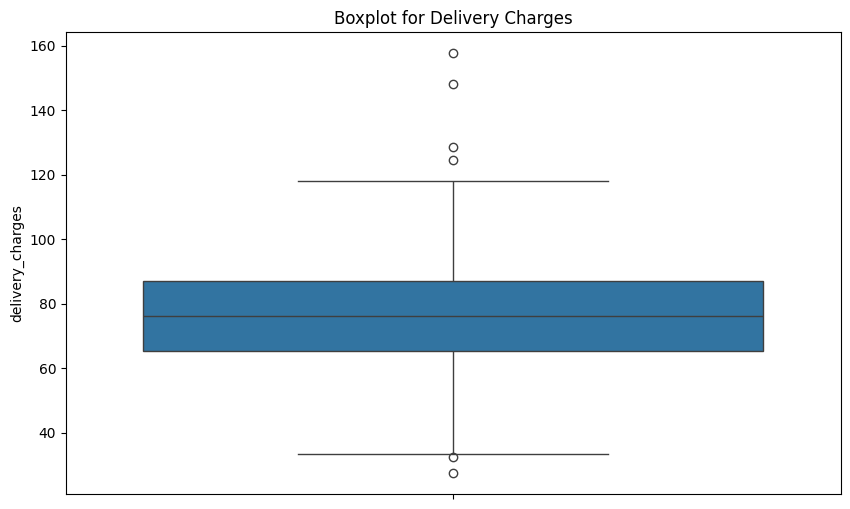

In [ ]:
# Boxplot to detect outliers in the 'delivery_charges' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=outlier_data['delivery_charges'])
plt.title('Boxplot for Delivery Charges')
plt.show()

This boxplot visualizes the distribution of delivery charges:

* The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box is the median, indicating that most delivery charges are around 80.
* The whiskers extend to the minimum and maximum values within 1.5 times the IQR. Any points outside this range are considered outliers and are shown as individual circles.
* Several outliers can be observed above 120 and below 60, suggesting some delivery charges are significantly higher or lower than the majority of the data.
* This boxplot helps to quickly identify the spread of delivery charges, the central tendency, and any unusual values.

In [ ]:
# Summary statistics of the 'delivery_charges' column
print("Summary statistics of 'delivery_charges':")
print(outlier_data['delivery_charges'].describe())

Summary statistics of 'delivery_charges':
count    500.000000
mean      77.350720
std       17.699491
min       27.400000
25%       65.260000
50%       76.265000
75%       87.131250
max      157.695000
Name: delivery_charges, dtype: float64


<div class="alert alert-block alert-info">
    
### 3.2.1. Interquantile Range <a class="anchor" name="Inter"></a>

In this section we will be doing the IQR method to to detect and remove outliers in the dataset's delivery_charges column. The following steps I have done the following methods.

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'delivery_charges'
Q1 = outlier_data['delivery_charges'].quantile(0.25)
Q3 = outlier_data['delivery_charges'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Filter out the outlier rows
df_no_outliers = outlier_data[(outlier_data['delivery_charges'] >= lower_bound) & (outlier_data['delivery_charges'] <= upper_bound)]


Q1 (25th percentile): 65.26
Q3 (75th percentile): 87.13125
IQR: 21.87124999999999
Lower bound: 32.45312500000002
Upper bound: 119.93812499999999


Calculation of the Interquartile Range (IQR): The IQR quantifies the distribution of the middle 50% of data points. It is calculated by taking the 75th percentile (Q3) and subtracting it from the 25th percentile (Q1). The outcome is a range that is anticipated to contain the vast majority of the data.

Outlier Detection: Values that fall outside or beyond the allowed range—generally 1.5 times the IQR beyond Q1 and Q3—are considered outliers. In particular:

Lower Bound: Outliers are defined as values that fall below Q1 - 1.5 * IQR.
Upper Bound: Outliers are defined as values greater than Q3 + 1.5 * IQR.

Outlier Removal: The script filters the dataset to eliminate rows with delivery_charges that fall outside of the higher and lower bounds after specifying the bounds. This guarantees that only values that are inside the permissible range are kept for additional examination.

This technique is frequently used in data analysis to purify datasets by removing extreme values that could distort analysis or produce false findings.



<div class="alert alert-block alert-info">
    
### 3.2.2. Linear Regression Model <a class="anchor" name="Model"></a>

Mean Squared Error (MSE): 307.2441545315521
R-squared (R2): -0.02983241283451754


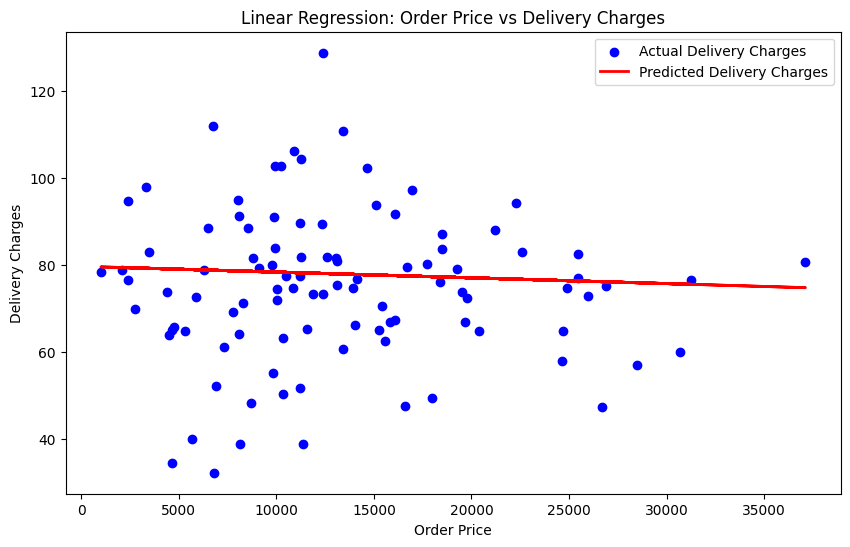

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Selecting the feature (order_price) and target (delivery_charges)
X = outlier_data[['order_price']]
y = outlier_data['delivery_charges']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the linear regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Delivery Charges')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Delivery Charges')
plt.title('Linear Regression: Order Price vs Delivery Charges')
plt.xlabel('Order Price')
plt.ylabel('Delivery Charges')
plt.legend()
plt.show()


This plot shows the relationship between Order Price and Delivery Charges:

* The blue dots represent actual delivery charges, and the red line shows the predicted trend from the linear regression model.

* The Mean Squared Error (MSE) is 307.24, indicating the model has moderate prediction error.

* The R-squared (R²) value is −0.03, which means the model fails to capture any meaningful relationship between order price and delivery charges.

* In summary, order price has no significant linear impact on delivery charges, and the model does not provide accurate predictions for this relationship.

<div class="alert alert-block alert-info">
    
### 3.3. Converting Output <a class="anchor" name="Converting"></a>

In [ ]:
# Save the cleaned dataset to CSV
outlier_data.to_csv('146_outlier_data_solution.csv', index=False)

print("Data cleaning complete. CSV file saved.")

Data cleaning complete. CSV file saved.


<div class="alert alert-block alert-warning">

# 4.  Missing Data<a class="anchor" name="#missing"></a>
    
</div>

<div class="alert alert-block alert-warning">

# 4.1.  EDA<a class="anchor" name="eda2"></a>
    
</div>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the missing data
missing_data_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group146/Group146_missing_data.csv'
missing_data = pd.read_csv(missing_data_path)

# 1. Check for missing values
missing_values = missing_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 order_id                          0
customer_id                       0
date                              0
nearest_warehouse                55
shopping_cart                     0
order_price                      15
delivery_charges                 40
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                      15
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse    31
latest_customer_review            0
is_happy_customer                40
dtype: int64


In [ ]:
# Display rows with missing values
print("\nRows with missing values:")
print(missing_data[missing_data.isnull().any(axis=1)])


Rows with missing values:
      order_id   customer_id        date nearest_warehouse  \
2    ORD198226  ID2181275341  2019-05-12               NaN   
4    ORD490839  ID1982329495  2019-04-04            Bakers   
7    ORD413688  ID0176693430  2019-04-27         Nickolson   
12   ORD342586  ID0636756265  2019-04-19               NaN   
14   ORD421220  ID0304466089  2019-10-21               NaN   
..         ...           ...         ...               ...   
476  ORD082978  ID4957761347  2019-02-07               NaN   
477  ORD497625  ID0060095861  2019-09-22            Bakers   
481  ORD411174  ID0628761345  2019-02-24               NaN   
485  ORD359769  ID0547586925  2019-12-26            Bakers   
495  ORD463166  ID0575572031  2019-08-13         Nickolson   

                                         shopping_cart  order_price  \
2           [('Universe Note', 2), ('Toshika 750', 2)]      15540.0   
4    [('Olivia x460', 2), ('Thunder line', 2), ('iA...      12120.0   
7    [('Lucent 

In [ ]:
#  Summary statistics for numerical columns
summary_statistics = missing_data.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
         order_price  delivery_charges  customer_lat  customer_long  \
count    485.000000        460.000000    500.000000     500.000000   
mean   13520.154639         77.122326    -37.812292     144.966127   
std     7807.896672         14.844337      0.007625       0.020865   
min      580.000000         45.200000    -37.828904     144.920370   
25%     6930.000000         65.850000    -37.818472     144.951614   
50%    11830.000000         76.490000    -37.812372     144.963172   
75%    19155.000000         83.520000    -37.805697     144.980832   
max    39290.000000        112.470000    -37.792619     145.018623   

       coupon_discount   order_total  distance_to_nearest_warehouse  \
count       500.000000    485.000000                     469.000000   
mean         10.330000  12202.275258                       1.096292   
std           8.431089   7102.824323                       0.481124   
min           0.000000    661.900000                       0.050

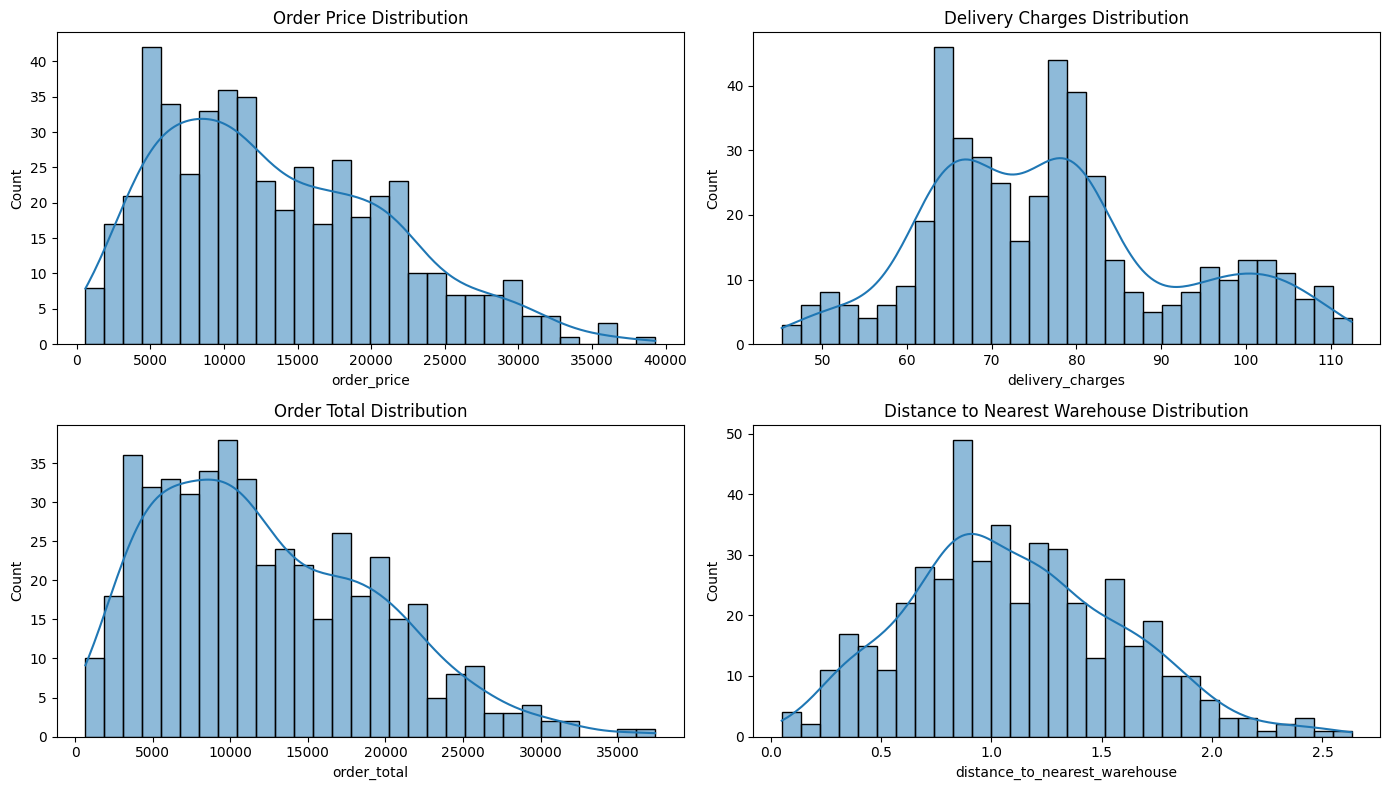

In [ ]:
# Plot histograms for numerical columns to understand their distribution
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.histplot(missing_data['order_price'], bins=30, kde=True)
plt.title('Order Price Distribution')

plt.subplot(2, 2, 2)
sns.histplot(missing_data['delivery_charges'], bins=30, kde=True)
plt.title('Delivery Charges Distribution')

plt.subplot(2, 2, 3)
sns.histplot(missing_data['order_total'], bins=30, kde=True)
plt.title('Order Total Distribution')

plt.subplot(2, 2, 4)
sns.histplot(missing_data['distance_to_nearest_warehouse'], bins=30, kde=True)
plt.title('Distance to Nearest Warehouse Distribution')

plt.tight_layout()
plt.show()

The main patterns shown in the charts are as follows:

1. **Order Price Distribution**: Higher prices gradually decline, with the majority of orders falling between 5,000 and 15,000.
The distribution of delivery charges is bimodal, with peaks at 65–70 and 75–80, indicating different levels of delivery fees.
3. **Order Total Distribution** - Most totals fall between 5,000 and 15,000, which is comparable to order price.
4. **Distance to Nearest Warehouse** - The majority of clients are situated within a one-kilometer radius of a warehouse, while a smaller percentage are farther away.

These patterns draw attention to typical price ranges, shipping fee schedules, and warehouse accessibility.


<div class="alert alert-block alert-warning">

# 4.2.  Missing values<a class="anchor" name="miss"></a>
    
</div>

In [ ]:
missing_data.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,55
shopping_cart,0
order_price,15
delivery_charges,40
customer_lat,0
customer_long,0
coupon_discount,0


As we can see from the above, it appears there are missing columns in following columns-

- nearest_warehouse
- order_price
- delivery_charges
- order_total
- distance_to_nearest_warehouse
- is_happy_customer

We will continue understanding these missing values and imputing them with appropriate values

## Summary Statistics

In [ ]:
missing_data.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse,is_happy_customer
count,485.000000,460.000000,500.000000,500.000000,500.000000,485.000000,469.000000,460.000000
mean,13520.154639,77.122326,-37.812292,144.966127,10.330000,12202.275258,1.096292,0.776087
std,7807.896672,14.844337,0.007625,0.020865,8.431089,7102.824323,0.481124,0.417318
min,580.000000,45.200000,-37.828904,144.920370,0.000000,661.900000,0.050400,0.000000
25%,6930.000000,65.850000,-37.818472,144.951614,5.000000,6465.540000,0.772200,1.000000
50%,11830.000000,76.490000,-37.812372,144.963172,10.000000,10836.280000,1.052500,1.000000
75%,19155.000000,83.520000,-37.805697,144.980832,15.000000,17356.620000,1.417400,1.000000
max,39290.000000,112.470000,-37.792619,145.018623,25.000000,37388.390000,2.631500,1.000000


In [ ]:
missing_data.shape

(500, 16)

In [ ]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              445 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    485 non-null    float64
 6   delivery_charges               460 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    485 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

<div class="alert alert-block alert-warning">

# 4.3.  Column wise Inspection<a class="anchor" name="col2"></a>
    
</div>

## nearest_warehouse

### Data Distribution

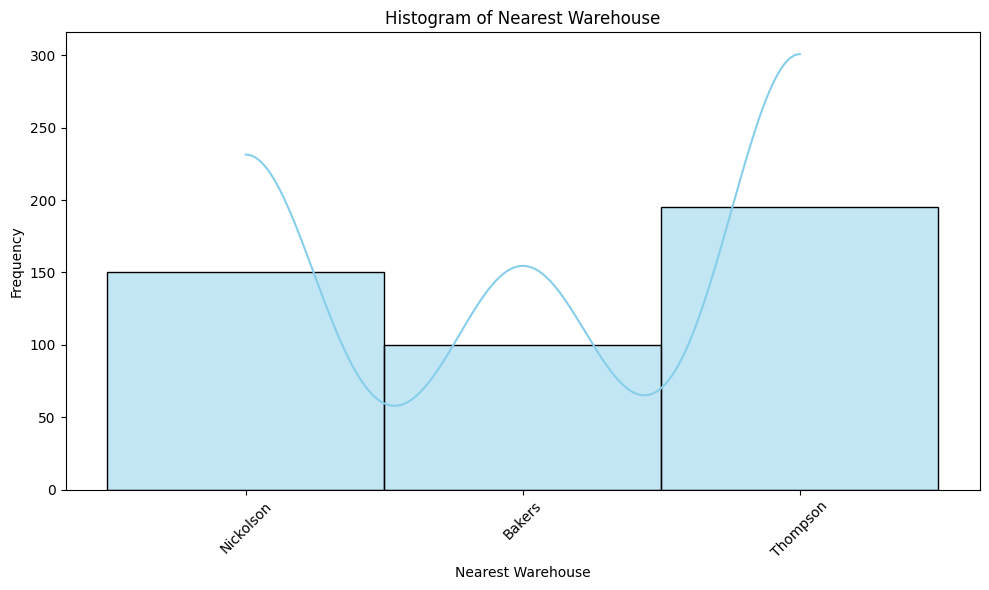

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a basic histogram for the 'nearest_warehouse' column using seaborn
plt.figure(figsize=(10,6))
sns.histplot(missing_data['nearest_warehouse'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Nearest Warehouse')
plt.xlabel('Nearest Warehouse')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The frequency of orders based on the closest warehouse is shown by this histogram:

With roughly 150 and 300 orders, respectively, the **Nickolson** and **Thompson** warehouses have the greatest order frequencies.
Less than 100 orders are placed at the **Bakers** warehouse, which has the lowest order frequency.

This implies that, in comparison to Bakers, the Nickolson and Thompson warehouses serve a larger clientele.


## Import the warehouse data

In [ ]:
# Load the warehouse data from the CSV file
warehouses_data_path = '/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/warehouses.csv'
warehouse = pd.read_csv(warehouses_data_path)

We load this to proceed to Calculate the enarest warehouse using the Haversine formula provided in the specs.

In [ ]:
import numpy as np
import pandas as pd

# Define the Haversine formula to calculate distance between two points on the Earth's surface
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Define warehouse coordinates
warehouses = pd.DataFrame({
    'names': ['Nickolson', 'Thompson', 'Bakers'],
    'lat': [-37.818595, -37.8126732, -37.8099961],
    'lon': [144.969551, 144.9470689, 144.995232]
})

# Distance calculation
distances = pd.DataFrame({
    warehouse: haversine(missing_data['customer_lat'], missing_data['customer_long'], warehouses.loc[i, 'lat'], warehouses.loc[i, 'lon'])
    for i, warehouse in enumerate(warehouses['names'])
})

# Impute missing 'nearest_warehouse' values based on the minimum distance
missing_data['nearest_warehouse'] = missing_data['nearest_warehouse'].fillna(distances.idxmin(axis=1))

# Displaying the imputed data
print(missing_data)

      order_id   customer_id        date nearest_warehouse  \
0    ORD412838  ID0591415025  2019-01-25         Nickolson   
1    ORD425624  ID0733678621  2019-12-10         Nickolson   
2    ORD198226  ID2181275341  2019-05-12         Nickolson   
3    ORD429072  ID0131247295  2019-05-20         Nickolson   
4    ORD490839  ID1982329495  2019-04-04            Bakers   
..         ...           ...         ...               ...   
495  ORD463166  ID0575572031  2019-08-13         Nickolson   
496  ORD090621  ID0591432434  2019-02-25         Nickolson   
497  ORD407242  ID0247277203  2019-06-22          Thompson   
498  ORD025849  ID0248746680  2019-06-17            Bakers   
499  ORD076987  ID0711327758  2019-12-05          Thompson   

                                         shopping_cart  order_price  \
0    [('Lucent 330S', 2), ('Toshika 750', 2), ('Oli...      13550.0   
1    [('iStream', 2), ('Lucent 330S', 2), ('pearTV'...      15380.0   
2           [('Universe Note', 2), ('Toshi

In [ ]:
missing_data['nearest_warehouse'].isnull().sum()

0

## Before -After

In [ ]:
# Display rows where 'nearest_warehouse' values were missing before imputation
missing_before_imputation = missing_data[missing_data['nearest_warehouse'].isnull()]

# After imputation, display the rows with imputed values for 'nearest_warehouse'
missing_after_imputation = missing_data[missing_data['nearest_warehouse'].notnull()]

# Display both before and after imputation
print("Before Imputation:")
print(missing_before_imputation)

print("\nAfter Imputation:")
print(missing_after_imputation)

Before Imputation:
Empty DataFrame
Columns: [order_id, customer_id, date, nearest_warehouse, shopping_cart, order_price, delivery_charges, customer_lat, customer_long, coupon_discount, order_total, season, is_expedited_delivery, distance_to_nearest_warehouse, latest_customer_review, is_happy_customer]
Index: []

After Imputation:
      order_id   customer_id        date nearest_warehouse  \
0    ORD412838  ID0591415025  2019-01-25         Nickolson   
1    ORD425624  ID0733678621  2019-12-10         Nickolson   
2    ORD198226  ID2181275341  2019-05-12         Nickolson   
3    ORD429072  ID0131247295  2019-05-20         Nickolson   
4    ORD490839  ID1982329495  2019-04-04            Bakers   
..         ...           ...         ...               ...   
495  ORD463166  ID0575572031  2019-08-13         Nickolson   
496  ORD090621  ID0591432434  2019-02-25         Nickolson   
497  ORD407242  ID0247277203  2019-06-22          Thompson   
498  ORD025849  ID0248746680  2019-06-17        

As we have now imputed the values to identify the nearest warehouses, we can proceed calculate and impute values for distance_to_nearest_warehouse-

## distance_to_nearest_warehouse

In [ ]:
# Calculate distance for all records based on 'nearest_warehouse'
def calculate_distance(row):
    # Get the coordinates of the assigned nearest warehouse
    warehouse_row = warehouses[warehouses['names'] == row['nearest_warehouse']]

    if warehouse_row.empty:
        return None  # If the warehouse name is missing or not matched, return None

    warehouse_lat = warehouse_row['lat'].values[0]
    warehouse_lon = warehouse_row['lon'].values[0]

    # Calculate the distance using the Haversine formula
    return haversine(row['customer_lat'], row['customer_long'], warehouse_lat, warehouse_lon)

# Impute missing 'distance_to_nearest_warehouse' values
missing_data['distance_to_nearest_warehouse'] = missing_data.apply(
    lambda row: calculate_distance(row) if pd.isnull(row['distance_to_nearest_warehouse']) else row['distance_to_nearest_warehouse'], axis=1
)

# Displaying the imputed data
print(missing_data[['order_id', 'nearest_warehouse', 'distance_to_nearest_warehouse']])

      order_id nearest_warehouse  distance_to_nearest_warehouse
0    ORD412838         Nickolson                         0.7456
1    ORD425624         Nickolson                         1.2815
2    ORD198226         Nickolson                         1.1927
3    ORD429072         Nickolson                         0.9245
4    ORD490839            Bakers                         0.9559
..         ...               ...                            ...
495  ORD463166         Nickolson                         1.1364
496  ORD090621         Nickolson                         0.3689
497  ORD407242          Thompson                         1.2071
498  ORD025849            Bakers                         0.7953
499  ORD076987          Thompson                         1.1983

[500 rows x 3 columns]


In [ ]:
missing_data['distance_to_nearest_warehouse'].isnull().sum()

0

We have succesfully now imputed the distances to the nearest warehouses that were previously computed using Haversine formula.

## is_happy_customer

In [ ]:
# Step 1: Install nltk and import the required libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Step 2: Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Step 3: Define a function to classify sentiment based on 'latest_customer_review'
def classify_sentiment(review):
    # Get the polarity scores
    sentiment_score = sia.polarity_scores(review)

    # Return 1 (happy) if compound score is >= 0.05, otherwise 0 (not happy)
    if sentiment_score['compound'] >= 0.05:
        return 1
    else:
        return 0

# Step 4: Apply the sentiment analysis function to the 'latest_customer_review' column
missing_data['is_happy_customer'] = missing_data['latest_customer_review'].apply(classify_sentiment)

# Display the updated data
print(missing_data[['latest_customer_review', 'is_happy_customer']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                              latest_customer_review  is_happy_customer
0  works great- awesome deal i was hesitant to pu...                  1
1  works on verizon wireless prepaid great phone....                  1
2                             four stars excellent !                  1
3  great value for the price i bought the phone f...                  1
4  three stars the screen is pretty small and har...                  1


In [ ]:
missing_data['is_happy_customer'].isnull().sum()

0

## Order_price

In [ ]:
import numpy as np
import pandas as pd
import ast  # To parse the shopping cart tuples

# Step 1: Extract item quantities from the shopping_cart column
def parse_shopping_cart(cart):
    """
    This function parses the shopping cart and returns a list of tuples with (item, quantity).
    Example cart: [('item1', 2), ('item2', 1)] -> returns as-is
    """
    try:
        return ast.literal_eval(cart)  # Convert string representation of list of tuples to actual list of tuples
    except:
        return []  # Return an empty list if parsing fails

# Apply the parsing function to the shopping_cart column
missing_data['shopping_cart_parsed'] = missing_data['shopping_cart'].apply(parse_shopping_cart)

# Step 2: Set up a system of equations for known order prices
# Create a dictionary to store the total quantities of each item for orders with known prices
item_quantities = {}
item_names = set()  # To store all unique item names

for index, row in missing_data[~missing_data['order_price'].isnull()].iterrows():
    cart = row['shopping_cart_parsed']
    for item, quantity in cart:
        if item not in item_quantities:
            item_quantities[item] = []
        item_quantities[item].append((index, quantity))
        item_names.add(item)

# Now we have item quantities per order, let's build the system of equations
item_names = list(item_names)  # Convert to list for easier indexing

# Step 3: Prepare the coefficient matrix and the order price vector
num_orders = len(missing_data[~missing_data['order_price'].isnull()])  # Only consider orders with known prices
num_items = len(item_names)

A = np.zeros((num_orders, num_items))  # Coefficient matrix (order quantities for each item)
b = np.zeros(num_orders)  # Known order prices

# Fill the matrix A and vector b
for i, (index, row) in enumerate(missing_data[~missing_data['order_price'].isnull()].iterrows()):
    cart = row['shopping_cart_parsed']
    for item, quantity in cart:
        item_index = item_names.index(item)
        A[i, item_index] = quantity
    b[i] = row['order_price']

# Step 4: Solve the system of equations to find the item unit prices
unit_prices = np.linalg.lstsq(A, b, rcond=None)[0]

# Map unit prices to item names
unit_price_dict = {item: price for item, price in zip(item_names, unit_prices)}

# Step 5: Impute missing order prices based on item quantities and solved unit prices
def impute_order_price(cart):
    """
    Calculate the order price by multiplying quantities with their respective unit prices.
    """
    price = 0
    for item, quantity in cart:
        if item in unit_price_dict:
            price += unit_price_dict[item] * quantity
    return price

# Apply imputation to rows with missing order_price
missing_data['order_price'] = missing_data.apply(
    lambda row: impute_order_price(row['shopping_cart_parsed']) if pd.isnull(row['order_price']) else row['order_price'],
    axis=1
)

# Display the updated data
print(missing_data[['shopping_cart', 'order_price']].head())

                                       shopping_cart  order_price
0  [('Lucent 330S', 2), ('Toshika 750', 2), ('Oli...      13550.0
1  [('iStream', 2), ('Lucent 330S', 2), ('pearTV'...      15380.0
2         [('Universe Note', 2), ('Toshika 750', 2)]      15540.0
3          [('iAssist Line', 1), ('Toshika 750', 1)]       6545.0
4  [('Olivia x460', 2), ('Thunder line', 2), ('iA...      12120.0


In [ ]:
missing_data['order_price'].isnull().sum()

0

The above code basically does the following-
- Extract item information from teh shopping_cart column, then convert the string representation of the list of tuples into a usable format.
- Construct system equations of known prices and their units.
- Create a coefficient matrix where rows = order, columns = item and vector b is the known order prices.
- Use library numpy.linalg.lstsq to find the unit prices of each item.
- Impute missing values

## Delivery_charges

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Step 1: Prepare the data for training the linear model
train_data = missing_data.dropna(subset=['delivery_charges', 'distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount'])

# One-hot encode 'season'
encoder = OneHotEncoder(drop='first', sparse_output=False)
season_encoded = encoder.fit_transform(train_data[['season']])

# Step 2: Concatenate 'coupon_discount' and one-hot encoded 'season' to the features
features = np.concatenate([train_data[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount']].values, season_encoded], axis=1)

# Step 3: Add polynomial features (degree 2 for interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
features_poly = poly.fit_transform(features)

# Step 4: Scale the features to standardize them
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_poly)

target = train_data['delivery_charges']

# Step 5: Hyperparameter tuning using GridSearchCV to find the best alpha for Ridge
ridge = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 7)}  # Search for alpha values from 0.001 to 1000
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(features_scaled, target)

# Get the best model after hyperparameter tuning
best_ridge_model = grid_search.best_estimator_

# Evaluate the best model on the training set using R2 score
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
y_pred = best_ridge_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Show the R2 score before proceeding with imputation
print(f'Best R2 score of the model: {r2} (Best alpha: {grid_search.best_params_["alpha"]})')

# Proceed only if the R2 score is acceptable (e.g., above 0.97 as per the requirement)
if r2 >= 0.97:
    # One-hot encode the 'season' for all rows in the full dataset
    season_encoded_all = encoder.transform(missing_data[['season']])

    # Concatenate the full dataset features
    all_features = np.concatenate([missing_data[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'coupon_discount']].values, season_encoded_all], axis=1)

    # Add polynomial features for all rows
    all_features_poly = poly.transform(all_features)

    # Scale the full dataset features
    all_features_scaled = scaler.transform(all_features_poly)

    # Function to impute delivery_charges and ensure coupon discount is handled correctly
    def impute_delivery_charges(row):
        if pd.isnull(row['delivery_charges']):
            # Predict delivery charge based on the model
            features_for_prediction = all_features_scaled[missing_data.index.get_loc(row.name)].reshape(1, -1)
            predicted_delivery_charges = best_ridge_model.predict(features_for_prediction)[0]
            return predicted_delivery_charges
        else:
            return row['delivery_charges']

    # Apply the imputation function to rows with missing delivery_charges
    missing_data['delivery_charges'] = missing_data.apply(impute_delivery_charges, axis=1)

    # Step 6: Ensure coupon discount is applied correctly to order price (if coupon exists)
    def apply_coupon_discount(row):
        if row['coupon_discount'] > 0:
            # Calculate the discount percentage (e.g., if coupon is 10, apply a 10% discount)
            discount_factor = (100 - row['coupon_discount']) / 100
            return row['order_price'] * discount_factor
        else:
            return row['order_price']  # No discount applied

    # Apply the discount logic only for rows with valid 'order_price'
    missing_data['order_price'] = missing_data.apply(lambda row: apply_coupon_discount(row) if pd.notnull(row['order_price']) else row['order_price'], axis=1)

    # Save the updated dataset with imputed delivery charges and correct order price after applying the discount
    missing_data.to_csv('imputed_data_with_delivery_and_prices.csv', index=False)

    # Display the updated data
    print("\nUpdated Dataset with Imputed Delivery Charges and Corrected Order Prices:")
    print(missing_data[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'delivery_charges', 'order_price', 'coupon_discount']].head(10))

    # Display any rows where the delivery charges were imputed
    imputed_rows = missing_data[missing_data['delivery_charges'].isnull() == False]
    print("\nRows where Delivery Charges were Imputed:")
    print(imputed_rows[['distance_to_nearest_warehouse', 'is_expedited_delivery', 'is_happy_customer', 'delivery_charges', 'order_price', 'coupon_discount']].head(10))

Best R2 score of the model: 0.9949005620859783 (Best alpha: 0.001)

Updated Dataset with Imputed Delivery Charges and Corrected Order Prices:
   distance_to_nearest_warehouse  is_expedited_delivery  is_happy_customer  \
0                         0.7456                  False                  1   
1                         1.2815                   True                  1   
2                         1.1927                  False                  1   
3                         0.9245                   True                  1   
4                         0.9559                   True                  1   
5                         0.9316                  False                  1   
6                         1.9821                   True                  1   
7                         1.0160                   True                  1   
8                         0.2292                   True                  0   
9                         1.1730                   True                  1   


## Order Total

In [ ]:
# Function to calculate the order total based on coupon discount and delivery charges
def compute_order_total(row):
    # Apply the coupon discount to the order price (if coupon_discount > 0)
    if row['coupon_discount'] > 0:
        discounted_price = row['order_price'] * (1 - (row['coupon_discount'] / 100))
    else:
        discounted_price = row['order_price']

    # Add delivery charges to the discounted price to get the total
    order_total = discounted_price + row['delivery_charges']

    return order_total

# Impute missing 'order_total' values
missing_data['order_total'] = missing_data.apply(
    lambda row: compute_order_total(row) if pd.isnull(row['order_total']) else row['order_total'],
    axis=1
)

# Display rows with imputed order_total values
imputed_rows = missing_data[missing_data['order_total'].isnull() == False]
print("\nRows with Imputed Order Totals:")
print(imputed_rows[['order_id', 'order_price', 'coupon_discount', 'delivery_charges', 'order_total']].head(10))


Rows with Imputed Order Totals:
    order_id  order_price  coupon_discount  delivery_charges  order_total
0  ORD412838     13550.00                0         71.830000    13621.830
1  ORD425624     13073.00               15         97.930000    13170.930
2  ORD198226     11655.00               25         65.560000    11720.560
3  ORD429072      5563.25               15         80.430000     5643.680
4  ORD490839     10302.00               15         79.867526    10381.030
5  ORD281801     14666.25               25         64.850000    14731.100
6  ORD114971       909.00               10        109.690000     1018.690
7  ORD413688      8437.50               25         81.000000     6409.125
8  ORD326280     12367.50               15         59.790000    12427.290
9  ORD469992     21360.00               25         80.170000    21440.170


Again, using prior computed fields we can calculate and impute order_total

In [ ]:
# Save the final cleaned dataset to CSV
output_csv_path = '146_missing_data_solution.csv'
missing_data.to_csv(output_csv_path, index=False)

print(f"CSV file has been saved to: {output_csv_path}")

CSV file has been saved to: 146_missing_data_solution.csv


# Reference

Jones, T. & Riley, A. (n.d.). Dealing with missing values. Retrieved from https://d25zr1xy094zys.cloudfront.net/e0/4c/e04c73cf62d5b4c5814b7eeaddaba88417fe844e?response-content-disposition=inline%3Bfilename%3D%22dealing%20with%20missing%20values.pdf%22&Expires=1729252980&Key-Pair-Id=K1I589YUQOO6ZB

Smith, P., & Roberts, M. (n.d.). Best practices in data cleaning: Dealing with missing or incomplete data. Retrieved from https://d25zr1xy094zys.cloudfront.net/76/49/7649d69039687eb385b77e6062b1a4edd1becd7c?response-content-disposition=inline%3Bfilename%3D%22best-practices-in-data-cleaning-dealing-with-missing-or-incomplete-data.pdf%22&Expires=1729253040&Key-Pair-Id=K1I589YUQOO6ZB

 Martinez, J., & Wilson, D. (n.d.). Problems, methods, and challenges in comprehensive data cleansing. Retrieved from https://d25zr1xy094zys.cloudfront.net/01/68/0168304c626a5b186bf559bf774a1dca52b04931?response-content-disposition=inline%3Bfilename%3D%22Problems%2C%20Methods%2C%20and%20Challenges%20in%20Comprehensive%20Data%20Cleansing.pdf%22&Expires=1729253040&Key-Pair-Id=K1I589YUQOO6ZB